Word2Vec(Word Embedding to Vector)

Bag of Word는 vector size가 매우 크고 sparse하므로 성능이 잘 나오지 않음
특징 - 주위 단어가 비슷하면 해당 단어의 의미는 유사하다
단어를 트레이닝 시킬 때, 주위 단어를 label로 매치하여 최적화
단어 의미를 내포한 dense vector로 매칭 시키는 것

분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다.
예를 들어, 파리-프랑스, 베를링-독일 을 같은 방식으로 이해함

두 가지 기법
CBOW(continuous bag of words) - 전체 텍스트로 하나의 단어를 예측함, 작은 데이터셋일수록 유리
___가 맛있다

skip_gram - 타겟 단어들로부터 원본 단어를 역으로 예측하는 것, cbow는 반대로 컨텍스트-타겟 쌍을 새로운
발견으로 처리하고, 큰 규모의 데이터셋을 가질 때 유리하다
배라는 단어 주변에 올 수 있는 단어를 예측한다.
*배*가 맛있다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('data/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)


(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [3]:

from KaggleWord2VecUtility import KaggleWord2VecUtility
sentences = []
for review in train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)
for review in unlabeled_train["review"]:
    sentences += KaggleWord2VecUtility.review_to_sentences(
        review, remove_stopwords=False)
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [4]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model



2020-02-16 00:48:32,057 : INFO : 'pattern' package not found; tag filters are not available for English
2020-02-16 00:48:32,068 : INFO : collecting all words and their counts
2020-02-16 00:48:32,069 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-02-16 00:48:32,117 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2020-02-16 00:48:32,160 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2020-02-16 00:48:32,211 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2020-02-16 00:48:32,253 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2020-02-16 00:48:32,293 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2020-02-16 00:48:32,328 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2020-02-16 00:48:32,378 : INFO : PROGRESS: at senten

2020-02-16 00:48:35,419 : INFO : PROGRESS: at sentence #710000, processed 15880377 words, keeping 82561 word types
2020-02-16 00:48:35,465 : INFO : PROGRESS: at sentence #720000, processed 16105664 words, keeping 83037 word types
2020-02-16 00:48:35,509 : INFO : PROGRESS: at sentence #730000, processed 16332045 words, keeping 83572 word types
2020-02-16 00:48:35,557 : INFO : PROGRESS: at sentence #740000, processed 16553078 words, keeping 84128 word types
2020-02-16 00:48:35,602 : INFO : PROGRESS: at sentence #750000, processed 16771405 words, keeping 84600 word types
2020-02-16 00:48:35,651 : INFO : PROGRESS: at sentence #760000, processed 16990809 words, keeping 85069 word types
2020-02-16 00:48:35,699 : INFO : PROGRESS: at sentence #770000, processed 17217946 words, keeping 85645 word types
2020-02-16 00:48:35,748 : INFO : PROGRESS: at sentence #780000, processed 17448092 words, keeping 86161 word types
2020-02-16 00:48:35,796 : INFO : PROGRESS: at sentence #790000, processed 176751

2020-02-16 00:49:19,582 : INFO : EPOCH 4 - PROGRESS: at 61.13% examples, 1119030 words/s, in_qsize 7, out_qsize 0
2020-02-16 00:49:20,586 : INFO : EPOCH 4 - PROGRESS: at 69.59% examples, 1114846 words/s, in_qsize 8, out_qsize 0
2020-02-16 00:49:21,589 : INFO : EPOCH 4 - PROGRESS: at 78.20% examples, 1114270 words/s, in_qsize 8, out_qsize 0
2020-02-16 00:49:22,590 : INFO : EPOCH 4 - PROGRESS: at 86.48% examples, 1108840 words/s, in_qsize 8, out_qsize 0
2020-02-16 00:49:23,590 : INFO : EPOCH 4 - PROGRESS: at 94.54% examples, 1102502 words/s, in_qsize 7, out_qsize 0
2020-02-16 00:49:24,285 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-02-16 00:49:24,293 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-02-16 00:49:24,300 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-02-16 00:49:24,302 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-02-16 00:49:24,302 : INFO : EPOCH - 4 : training on 17798269 

In [5]:

# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2020-02-16 00:49:36,427 : INFO : precomputing L2-norms of word weight vectors
2020-02-16 00:49:36,472 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2020-02-16 00:49:36,473 : INFO : not storing attribute vectors_norm
2020-02-16 00:49:36,475 : INFO : not storing attribute cum_table
2020-02-16 00:49:36,830 : INFO : saved 300features_40minwords_10text


In [6]:

# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [7]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6359104514122009),
 ('lad', 0.5375007390975952),
 ('ladi', 0.4997125267982483),
 ('businessman', 0.4970291256904602),
 ('millionair', 0.48214685916900635),
 ('farmer', 0.4807016849517822),
 ('men', 0.47993260622024536),
 ('loner', 0.47002163529396057),
 ('priest', 0.46583399176597595),
 ('widow', 0.46342986822128296)]

In [8]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2020-02-16 00:49:37,454 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2020-02-16 00:49:37,662 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2020-02-16 00:49:37,663 : INFO : setting ignored attribute vectors_norm to None
2020-02-16 00:49:37,663 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2020-02-16 00:49:37,664 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2020-02-16 00:49:37,664 : INFO : setting ignored attribute cum_table to None
2020-02-16 00:49:37,664 : INFO : loaded 300features_40minwords_10text


11986
[ 0.01844472 -0.00060901 -0.08118101 -0.00641189 -0.06283727 -0.073703
  0.02364835 -0.01336757 -0.01336453  0.14476576]


In [9]:

df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.head(10)

,x,y
with,-5.492681,3.200974
all,-1.563026,-0.119640
this,-0.686294,-1.653958
stuff,-3.144274,-0.468545
go,-6.577247,-2.536773
down,-8.450383,4.278608
at,-7.629838,2.278328
the,-1.794562,1.860544
moment,1.508041,3.460312
mj,0.562590,7.349210


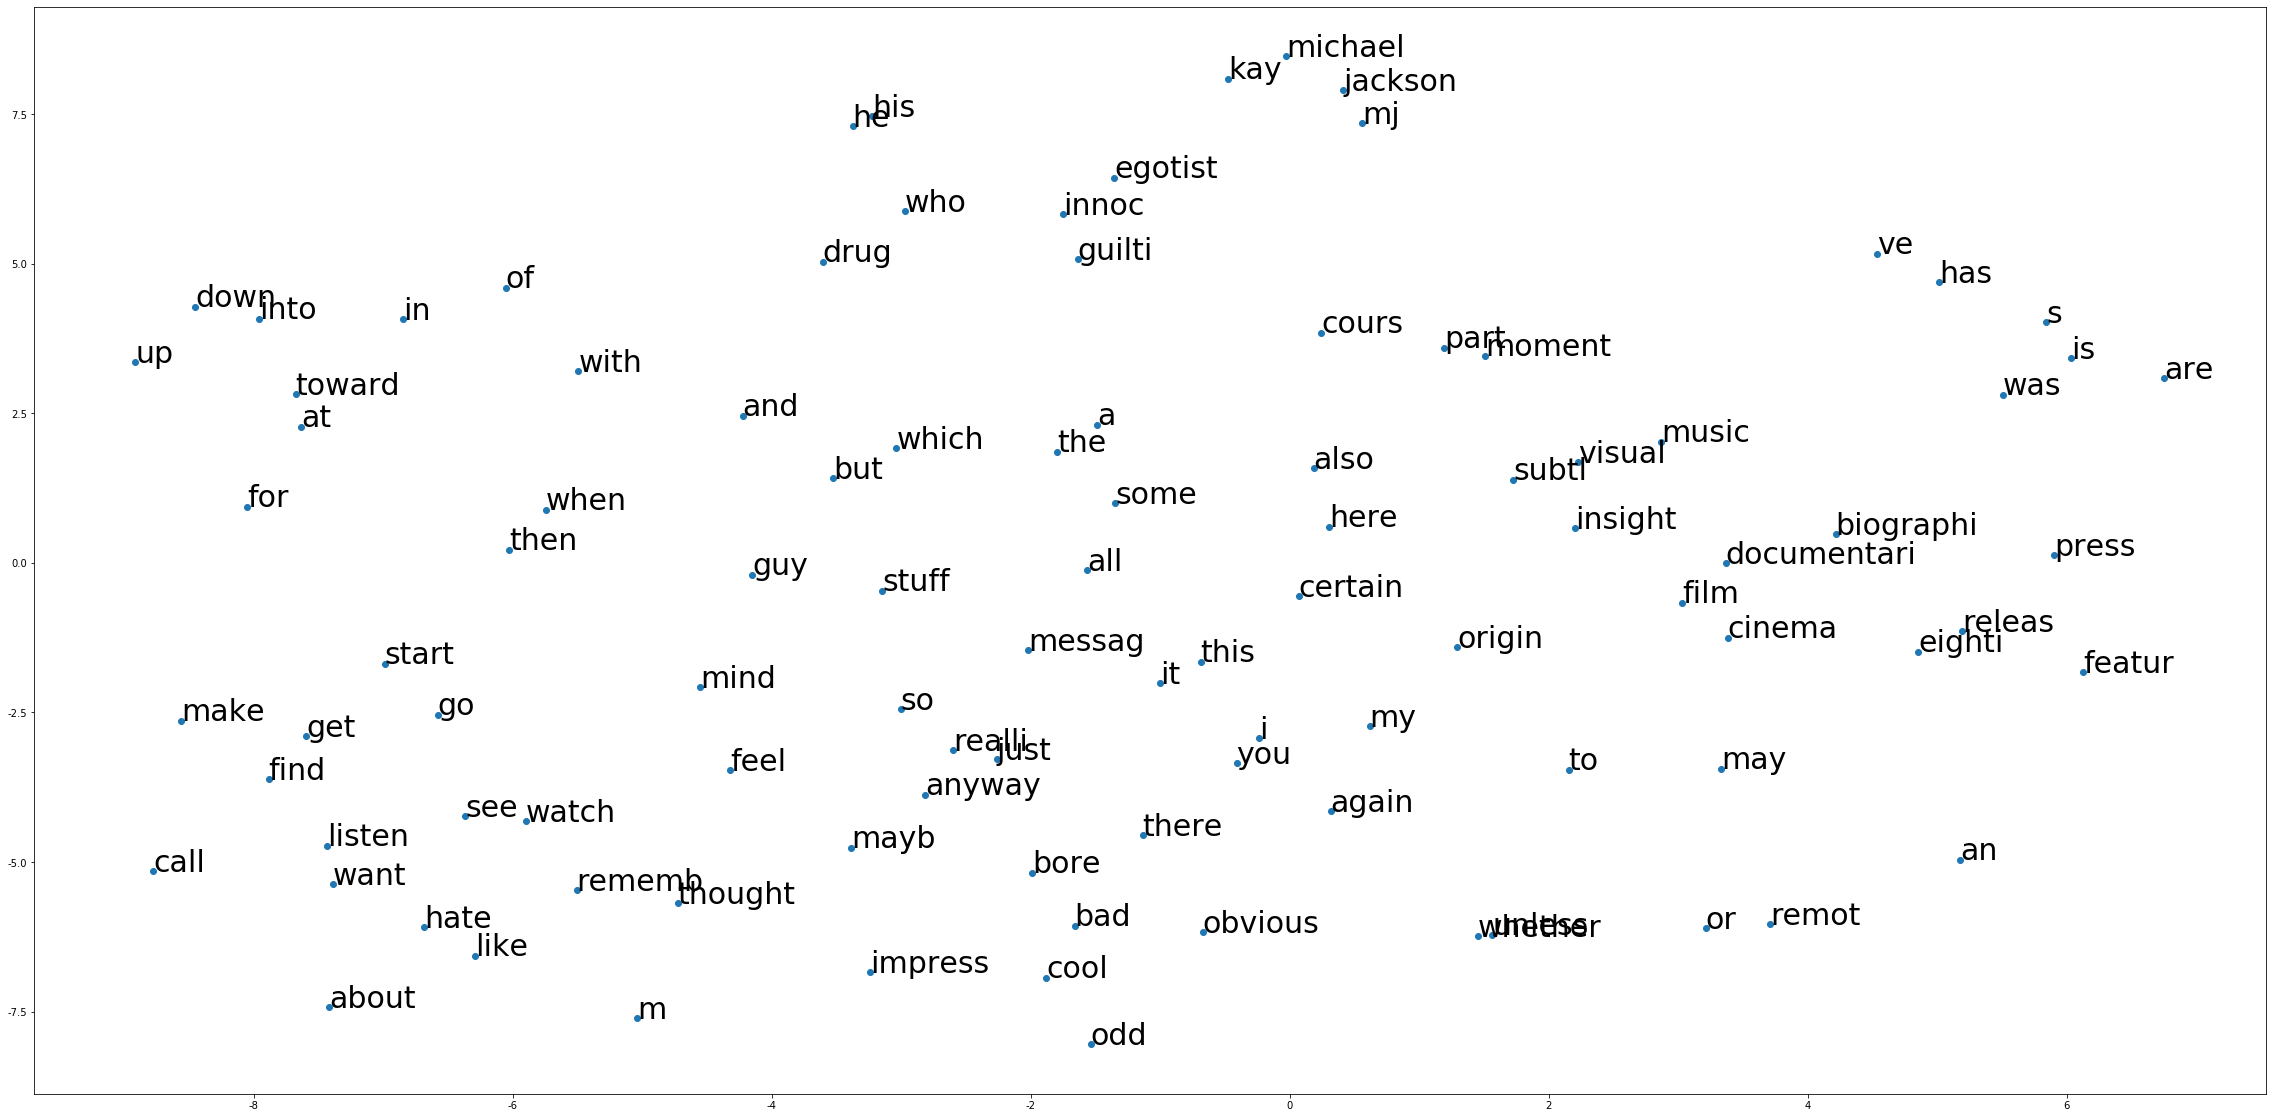

In [10]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [19]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
           print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = KaggleWord2VecUtility.apply_by_multiprocessing(\
        reviews["review"], KaggleWord2VecUtility.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [20]:

%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

AttributeError: type object 'KaggleWord2VecUtility' has no attribute 'apply_by_multiprocessing'

In [21]:

%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features )

AttributeError: type object 'KaggleWord2VecUtility' has no attribute 'apply_by_multiprocessing'

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [18]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

NameError: name 'trainDataVecs' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

In [ ]:
result = forest.predict( testDataVecs )

In [ ]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('data/Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3 

In [ ]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment